# Desafios
<ul>
   <li> minerar toda base e observar distribuicao de idades menor de 14 *  </li>
   <li> analisar as distribuições para esse dataset selecionado  </li>
 <ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [2]:
source = "../data/DADOS_ENEM_2019_SAMPLE_14.csv"
df = pd.read_csv(source)
df.head()

,b'NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025\n'
0,b'190001008625,2019,1502400,Castanhal,15,PA,13,F,1,3,...,A,A,A,B,A,A,B,A,A,A\n'
1,b'190001020708,2019,1501402,Bel\xe9m,15,PA,13,F,1,1,...,B,A,B,D,A,B,C,B,B,B\n'
2,b'190001046696,2019,1100049,Cacoal,11,RO,13,M,1,3,...,B,A,A,B,A,A,D,A,B,A\n'
3,b'190001048193,2019,1101492,S\xe3o Francisco do Guapor\xe9,11,RO,13,F,1,1,...,A,A,A,A,A,A,B,A,A,B\n'
4,b'190001052015,2019,1502103,Camet\xe1,15,PA,13,F,1,3,...,A,A,A,B,A,A,B,A,A,A\n'


In [3]:
len(df)

396

# Proporção de quais estados de alunos com idade menores de 14 anos.

<AxesSubplot:>

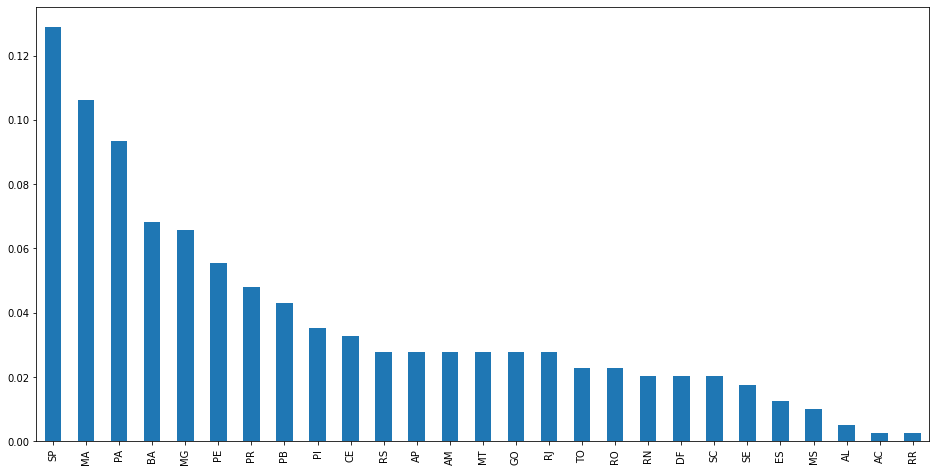

In [4]:
df["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(16,8))

<AxesSubplot:ylabel='SG_UF_RESIDENCIA'>

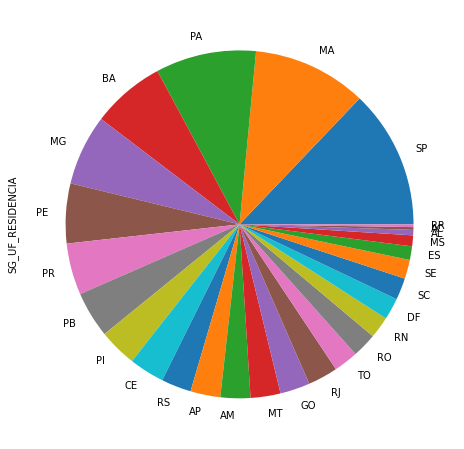

In [5]:
df["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(16,8))

In [6]:
df["SG_UF_RESIDENCIA"].value_counts(normalize = True)

SP    0.128788
MA    0.106061
PA    0.093434
BA    0.068182
MG    0.065657
PE    0.055556
PR    0.047980
PB    0.042929
PI    0.035354
CE    0.032828
RS    0.027778
AP    0.027778
AM    0.027778
MT    0.027778
GO    0.027778
RJ    0.027778
TO    0.022727
RO    0.022727
RN    0.020202
DF    0.020202
SC    0.020202
SE    0.017677
ES    0.012626
MS    0.010101
AL    0.005051
AC    0.002525
RR    0.002525
Name: SG_UF_RESIDENCIA, dtype: float64

In [7]:
list14 = df["SG_UF_RESIDENCIA"].value_counts(normalize = True)

In [72]:
uf  = []
val = []
i = 0
cumulative = 0
n = 6
for l in list14:
    if (i<7):
        print(list14.index[i],"-",round(l,4), "-", i)
        uf.append(list14.index[i])
        val.append(round(l,4))
    else:
        cumulative = cumulative + round(l,4)
    i = i + 1
uf.append('OUTROS')
val.append(round(cumulative,4))

SP - 0.1288 - 0
MA - 0.1061 - 1
PA - 0.0934 - 2
BA - 0.0682 - 3
MG - 0.0657 - 4
PE - 0.0556 - 5
PR - 0.048 - 6


In [73]:
cumulative

0.43439999999999995

In [74]:
uf


['SP', 'MA', 'PA', 'BA', 'MG', 'PE', 'PR', 'OUTROS']

In [75]:
val

[0.1288, 0.1061, 0.0934, 0.0682, 0.0657, 0.0556, 0.048, 0.4344]

In [76]:
cols = ['uf']

df_dist = pd.DataFrame(data=uf, columns=cols)

df_dist['value'] = val
df_dist['value'] = df_dist['value'] * 100
df_dist = df_dist.set_index('uf')


df_dist['value'] = pd.to_numeric(df_dist['value'] )


df_dist.head()

,value
uf,
SP,12.88
MA,10.61
PA,9.34
BA,6.82
MG,6.57


<AxesSubplot:ylabel='value'>

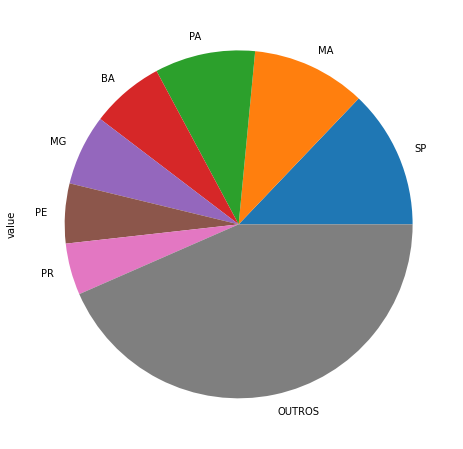

In [77]:
df_dist["value"].plot.pie(figsize=(16,8))

<AxesSubplot:xlabel='uf'>

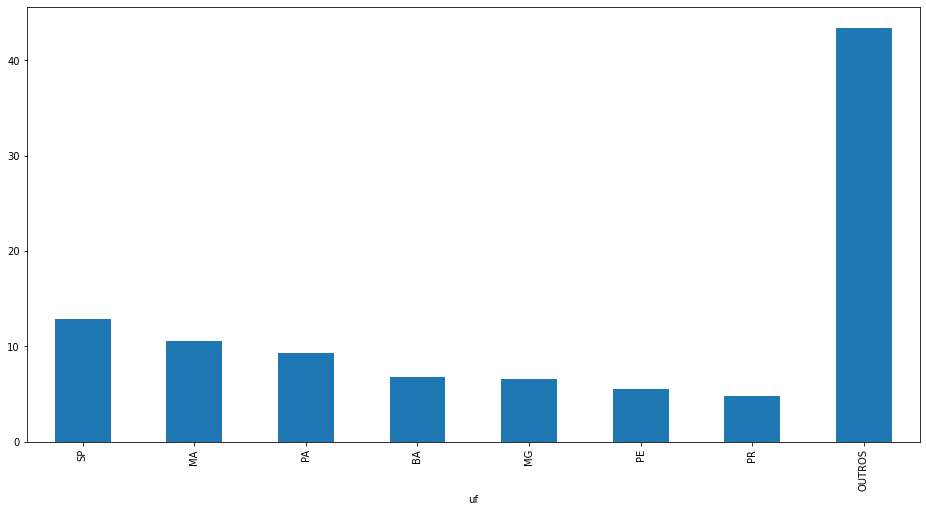

In [71]:
df_dist["value"].plot.bar(figsize=(16,8))